In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'Store-Sales-Time-Series-Forecast/oil.csv'
file_key_2 = 'Store-Sales-Time-Series-Forecast/holidays_events.csv'
file_key_3 = 'Store-Sales-Time-Series-Forecast/stores.csv'
file_key_4 = 'Store-Sales-Time-Series-Forecast/transactions.csv'
file_key_5 = 'Store-Sales-Time-Series-Forecast/train.csv'
file_key_6 = 'Store-Sales-Time-Series-Forecast/test.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

bucket_object_3 = bucket.Object(file_key_3)
file_object_3 = bucket_object_3.get()
file_content_stream_3 = file_object_3.get('Body')

bucket_object_4 = bucket.Object(file_key_4)
file_object_4 = bucket_object_4.get()
file_content_stream_4 = file_object_4.get('Body')

bucket_object_5 = bucket.Object(file_key_5)
file_object_5 = bucket_object_5.get()
file_content_stream_5 = file_object_5.get('Body')

bucket_object_6 = bucket.Object(file_key_6)
file_object_6 = bucket_object_6.get()
file_content_stream_6 = file_object_6.get('Body')

## Reading data-files
oil = pd.read_csv(file_content_stream_1)
holidays = pd.read_csv(file_content_stream_2)
stores = pd.read_csv(file_content_stream_3)
transactions = pd.read_csv(file_content_stream_4)
train = pd.read_csv(file_content_stream_5)
test = pd.read_csv(file_content_stream_6)

## Visualizing oil prices

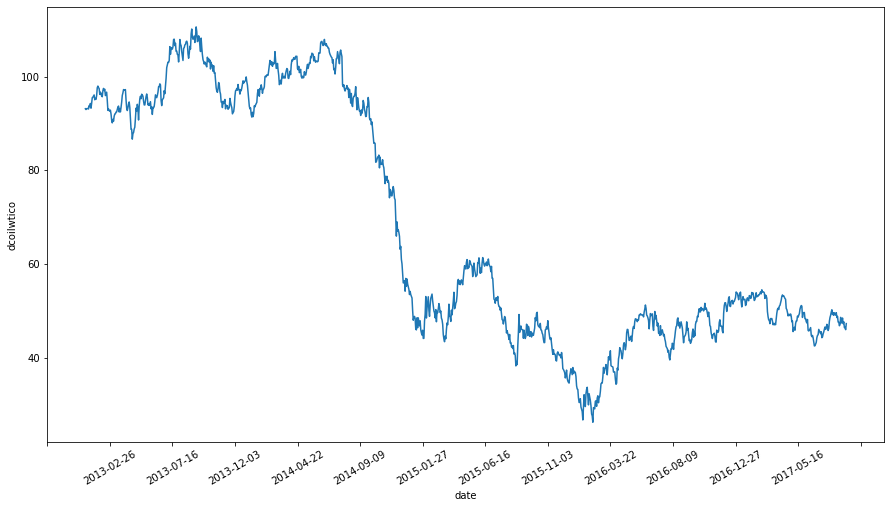

In [2]:
plt.figure(figsize = (15, 8))
ax = sns.lineplot(data = oil, x = 'date', y = 'dcoilwtico')
start, end = ax.get_xlim()
ax.set_xticks(np.arange(start, end, 100))
plt.xticks(rotation = 30);

## Holidays

In [3]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## Stores

In [4]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
stores['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [6]:
stores['cluster'].value_counts()

3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: cluster, dtype: int64